# Quantum Circuit Born Machine (QCBM)

Brief explanation of unsupervised generative learning and QCBM algorithm

In [1]:
connect = False  # Set to False if you want to run locally without QLMaaS

if connect:
    from qat.qlmaas import QLMaaSConnection
    conn = QLMaaSConnection(hostname="qlm35e.neasqc.eu", check_host=False)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from myqml import QCBM

### Gaussian distribution dataset

In [3]:
n_qubits = 6
n_blocks = 6
n_shots = 20000
device = 'myQLM'

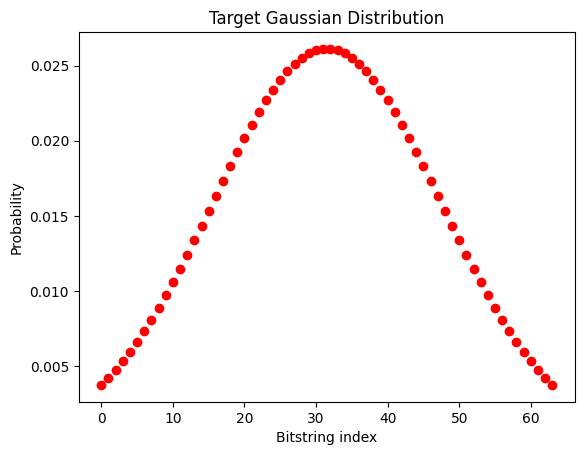

In [4]:
# Function to create a Gaussian probability distribution
def gaussian_pdf(num_bit, mu, sigma):
    '''Get normalized Gaussian distribution over 2^num_bit points'''
    x = np.arange(2**num_bit)
    pl = 1. / np.sqrt(2 * np.pi * sigma**2) * np.exp(-(x - mu)**2 / (2. * sigma**2))
    return pl / pl.sum()

# Define target distribution
pg = gaussian_pdf(n_qubits, mu=2**(n_qubits - 1) - 0.5, sigma=2**(n_qubits - 2))

# Plot target distribution
plt.plot(pg, 'ro')
plt.title("Target Gaussian Distribution")
plt.xlabel("Bitstring index")
plt.ylabel("Probability")
plt.show()

In [ ]:
qcbm = QCBM(
    n_qubits=n_qubits,
    n_blocks=n_blocks, 
    n_shots=n_shots,
    device=device
)

result, tracking_cost, fit_time = qcbm.fit(probs_target=pg)
print(f"QCBM fitting ended in {fit_time} s")

Step 1, Loss: 0.022360
Step 2, Loss: 0.014187
Step 3, Loss: 0.010307
Step 4, Loss: 0.007548
Step 5, Loss: 0.005600
Step 6, Loss: 0.004547
Step 7, Loss: 0.004069
Step 8, Loss: 0.003077
Step 9, Loss: 0.002554
Step 10, Loss: 0.002119
Step 11, Loss: 0.001946
Step 12, Loss: 0.001817
Step 13, Loss: 0.001361
Step 14, Loss: 0.001231
Step 15, Loss: 0.001123
Step 16, Loss: 0.000997
Step 17, Loss: 0.000952
Step 18, Loss: 0.000731
Step 19, Loss: 0.000777
Step 20, Loss: 0.000757
Optimization completed in 1597.57 seconds.
QCBM fitting ended in 1597.566064119339 s


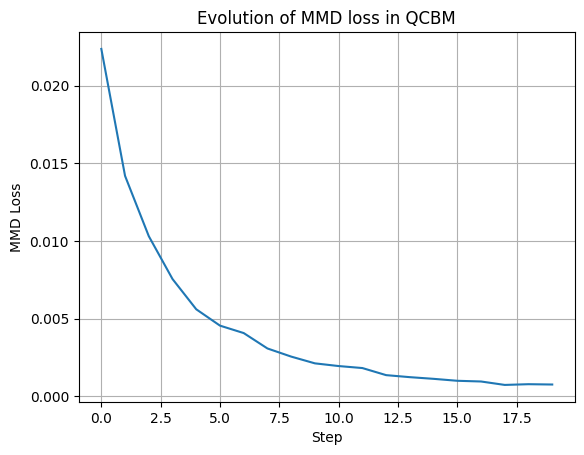

In [6]:
qcbm.plot_loss(tracking_cost)

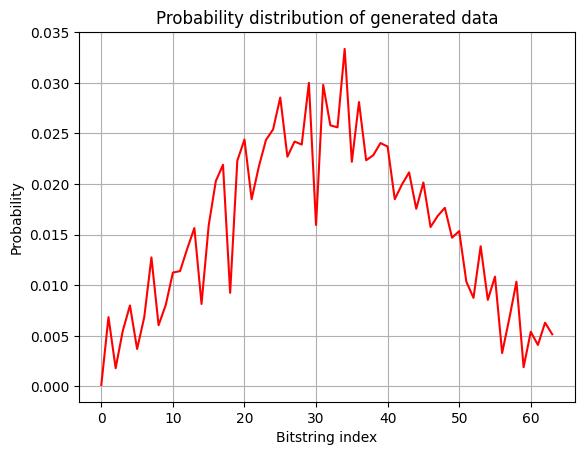

: 

In [ ]:
qcbm.plot_gen_disribution(result)